<a href="https://colab.research.google.com/github/matth315/Wisconsin-Driving-Fatalities/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [3]:
# Check for GPU
!nvidia-smi

Tue Mar  4 02:40:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


2.5.1+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

In [5]:
# Computer vision is being used in some obvious industries such as tracking license plates on the highway for speeding tickets and virtually placing advertisements on,
#  for example, the boards in hockey games. One less intuitive use I found when researching the topic was animal tracking, where you might want to make sure that none of
#  your pigs, horses, cows, etc. escape.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [6]:
# I already feel confident about what overfitting is, but it is basically where a model trains to the data set so closely that it becomes ineffective at analyzing new
#  data once it is introduced. If a model is overfit on 100 data points, it will not only model the true patterns, but it will also overcorrect to account for the natural
#  error. So if a 101st data point is added with small error in a new direction, the model will be worse at predicting it because it was trained too specifically.ssssssssssssssssssssssssssssssss

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [7]:
# Termination criteria: On an iteratively trained model, you should have strict enough termination criteria so that the model does not start to train too far.
# Regularization: The addition of regularization penalizes the model for having larger coefficients, so it encourages the model to get rid of "unnecessary" coefficients
# Dropout learning: Have certain neurons drop out of a neural network to prevent it from relying too much on specific elements of the model.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [8]:
# I tried uploading a few images, and it was interesting to see it process them. It predicted me to be a red panda, which I suppose might be the closest option to "human".
# I was impressed with how accurate it was for the given images.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [9]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor

# Setup training data
train_data = datasets.MNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.MNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [10]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

## 6. Visualize at least 5 different samples of the MNIST training dataset.

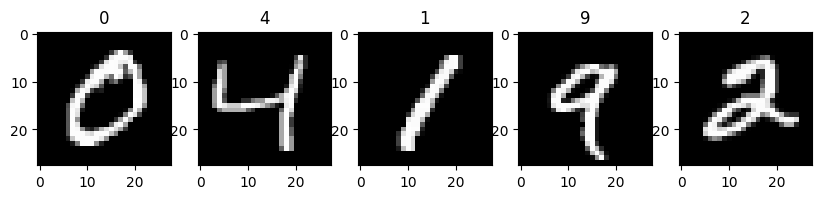

In [11]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize = (10, 20))
cols, rows = 5, 1
for i in range(1, 6):
  img, label = train_data[i]
  figure.add_subplot(1, 5, i)
  plt.title(label)
  plt.imshow(img.squeeze(), cmap = 'gray')
plt.show()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [12]:
!pip install torch

In [13]:
from torch.utils.data import DataLoader

train_data_loader = DataLoader(train_data, batch_size = 32)
test_data_loader = DataLoader(test_data, batch_size = 32)



## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [14]:
from torch import nn


# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device


# Create a convolutional neural network
class MNIST_Model(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model = MNIST_Model(input_shape=1,
    hidden_units=10,
    output_shape=10).to(device)
model

MNIST_Model(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [15]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [17]:
torch.manual_seed(42)
from tqdm.auto import tqdm

import requests
from pathlib import Path


from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1)

In [20]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [21]:
# Measure time
from timeit import default_timer as timer
train_time_start_model = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_data_loader,
        model=model,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_data_loader,
        model=model,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model = timer()
total_train_time_model = print_train_time(start=train_time_start_model,
                                           end=train_time_end_model,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.02880 | Train accuracy: 99.12%
Test loss: 0.04303 | Test accuracy: 98.61%

Epoch: 1
---------
Train loss: 0.02722 | Train accuracy: 99.17%
Test loss: 0.04665 | Test accuracy: 98.60%

Epoch: 2
---------
Train loss: 0.02553 | Train accuracy: 99.19%
Test loss: 0.04202 | Test accuracy: 98.70%

Train time on cuda: 37.029 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

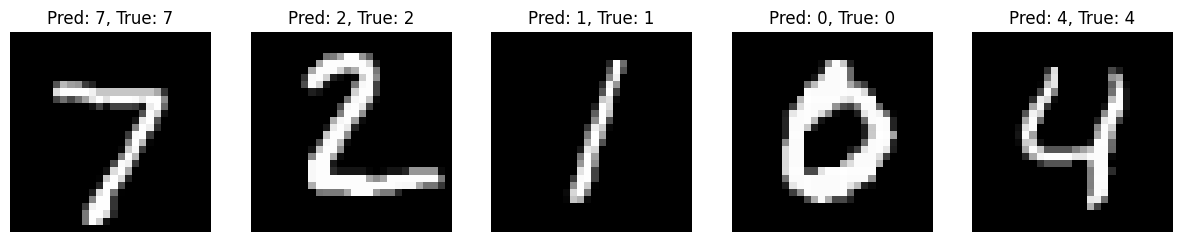

[[0.63434184 0.36441028 0.7104288 ]
 [0.9464111  0.7890298  0.28141373]
 [0.78863233 0.5894631  0.7539175 ]]


In [50]:
# prompt: print the value of a tensor without the device part

# Assuming 'model' is your trained model and 'test_data_loader' is your test dataloader
import matplotlib.pyplot as plt
import torch

# Get a batch of test data
X, y = next(iter(test_data_loader))

# Move data to the same device as your model
X, y = X.to(device), y.to(device)

# Make predictions
with torch.no_grad():
    preds = model(X)

# Convert predictions to class labels
pred_labels = preds.argmax(dim=1)

# Visualize predictions and compare to true labels
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    axes[i].imshow(X[i].cpu().squeeze(), cmap="gray")
    axes[i].set_title(f"Pred: {pred_labels[i].item()}, True: {y[i].item()}")
    axes[i].axis("off")

plt.show()

# Example of printing a tensor without the device information:
example_tensor = torch.rand(3,3).to(device)

print(example_tensor.cpu().numpy())


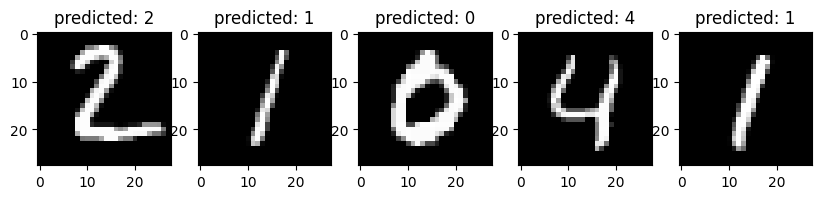

In [57]:
import numpy as np

# Actual
figure = plt.figure(figsize = (10, 20))
cols, rows = 5, 1
for i in range(1, 6):
  pred_class = torch.argmax(model(test_data[i][0].unsqueeze(dim=0).to(device))).item()
  img, label = test_data[i]
  full_label = 'predicted: ' + str(pred_class)
  figure.add_subplot(1, 5, i)
  plt.title(full_label)
  plt.imshow(img.squeeze(), cmap = 'gray')
plt.show()

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [86]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [87]:
all_predictions = []

# Iterate over all batches in test_data
for inputs, _ in test_data:
    # Check input shape; if it's [batch_size, 28, 28], add channel dimension.
    if len(inputs.shape) == 3:
        inputs = inputs.unsqueeze(1)  # Now shape: [batch_size, 1, 28, 28]
    inputs = inputs.to(device)

    # Forward pass for this batch
    pred_probs = model(inputs)

    # Get predictions for the batch
    preds = torch.argmax(pred_probs, dim=1)

    # Append predictions (move to CPU if needed)
    all_predictions.append(preds.cpu())

# Concatenate all batch predictions into one tensor
all_predictions = torch.cat(all_predictions, dim=0)

print(all_predictions)  # Contains predictions for all samples in test_data


tensor([7, 2, 1,  ..., 4, 5, 6])


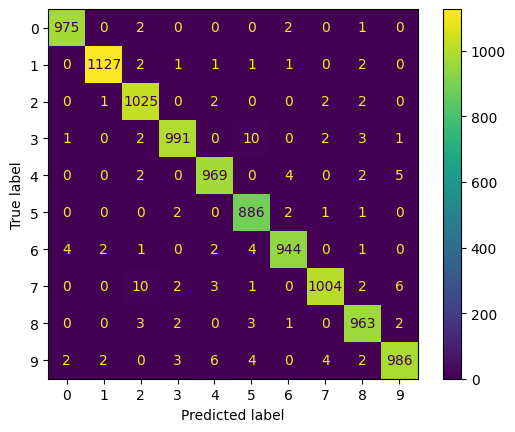

In [91]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_data.targets, all_predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)


cm_display.plot()
plt.show()

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?